## AutoAI で作成したモデルのJupyter上からの呼び出しサンプル
このコードは、AutoAIで生成したNotebookの後ろにコピペして利用するサンプルコードです。


検証用CSVデータ


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,blue-collar,single,secondary,yes,0,no,yes,cellular,16,jul,154,2,-1,0,unknown,no
1,41,management,married,tertiary,no,5,no,no,unknown,5,jun,178,1,-1,0,unknown,no
2,40,management,single,secondary,no,906,yes,no,cellular,5,may,67,4,-1,0,unknown,no
3,25,admin.,single,secondary,no,768,yes,no,unknown,13,may,203,1,-1,0,unknown,no
4,37,services,married,primary,no,0,yes,no,cellular,12,may,631,1,344,1,success,no



モデル入力データ


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45,blue-collar,single,secondary,yes,0,no,yes,cellular,16,jul,154,2,-1,0,unknown
1,41,management,married,tertiary,no,5,no,no,unknown,5,jun,178,1,-1,0,unknown
2,40,management,single,secondary,no,906,yes,no,cellular,5,may,67,4,-1,0,unknown
3,25,admin.,single,secondary,no,768,yes,no,unknown,13,may,203,1,-1,0,unknown
4,37,services,married,primary,no,0,yes,no,cellular,12,may,631,1,344,1,success



予測結果


/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: RuntimeWarning: invalid value encountered in sqrt
  Xt = transform.transform(Xt)


array(['no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)


混同行列


,no,yes
no,34162,1159
yes,2751,1928


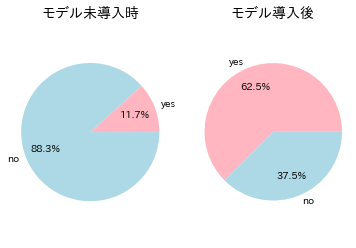

In [20]:
# 事前に用意した4万件の検証データで精度検証

%matplotlib inline
# 必要ライブラリの導入
!pip install japanize-matplotlib | tail -n 1

# 必要ライブラリのimport
import matplotlib.pyplot as plt

# 日本語化対応
import japanize_matplotlib #日本語化matplotlib

# データフレームに読み込み
csv_url = 'https://raw.githubusercontent.com/makaishi2/sample-data/master/data/bank-test.csv'
df_bank_test = pd.read_csv(csv_url)

# 結果確認
print('')
print('検証用CSVデータ')
display(df_bank_test.head())

# 正解データ correctの抽出
correct = df_bank_test.y.values

# 入力データ配列の作成

df_sub = df_bank_test.copy()

# 目的変数列の削除
df_sub = df_sub.drop('y', axis=1)

# 結果確認
print('')
print('モデル入力データ')
display(df_sub.head())

# 予測実施
X_prep = preprocessing_pipeline.transform(df_sub.values)
predict = pipeline.predict(X_prep)

# 結果確認
print('')
print('予測結果')
display(predict[:10])

# 混同行列の計算
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(correct, predict)
df_matrix = pd.DataFrame(matrix, columns=['no', 'yes'], index=['no', 'yes'])

### 混同行列表示
print()
print('混同行列')
display(df_matrix)

# 正解データの yesとnoの数の計算
y_count = np.count_nonzero(correct == 'yes')
n_count = np.count_nonzero(correct == 'no')

# 予測値がyesだったもののうち、正解データのyesとnoの数
yy_count = df_matrix.yes.yes
yn_count = df_matrix.yes.no

# モデルを使わない場合と使った場合の成約率の比較
print()
plt.subplot(1, 2, 1)
label = ['yes', 'no']
colors = ["lightpink", "lightblue"]
x = np.array([y_count, n_count])
plt.pie(x, labels=label, colors=colors,
       autopct="%1.1f%%", pctdistance=0.7)
plt.title('モデル未導入時', fontsize=14)
plt.axis('equal')
 
plt.subplot(1, 2, 2)
label = ['yes', 'no']
colors = ["lightpink", "lightblue"]
x = np.array([yy_count, yn_count])
plt.pie(x, labels=label, colors=colors,
       autopct="%1.1f%%", pctdistance=0.7)
plt.title('モデル導入後', fontsize=14)
plt.axis('equal')

plt.show()